In [1]:
import response_utils
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
plt.rcParams['figure.figsize'] = [12, 12]

%load_ext autoreload
%autoreload 2

### 3D ODE: $\frac{\partial T(x,y,t)}{\partial{t}} = -k(x) k(y) T(x,y,t) + F(t)$

In [85]:
# Setup problem parameters
dt = 0.1
t = np.arange(0,30,dt)
dx = 1
x = np.arange(dx,5,dx)[:, np.newaxis]
dy = 1
y = np.arange(dx,5,dx)[np.newaxis, :]
T0 = 10
k = 0.25
F0 = 0.5

T_none = response_utils.T_none(t, T0, k, dim=3, x=x, y=y)
F_none = response_utils.F_none(t)
g_none, a_none = response_utils.calc_modes_2D(T_none)

T_const = response_utils.T_const(t, T0, k, F0, dim=3, x=x, y=y)
F_const = response_utils.F_const(t, F0)
g_const, a_const = response_utils.calc_modes_2D(T_const)

T_sin = response_utils.T_sin(t, T0, k, F0, dim=3, x=x, y=y)
F_sin = response_utils.F_sin(t, F0)
#g_sin, a_sin = response_utils.calc_modes_2D(T_sin)

g_const_sub, a_const_sub = response_utils.calc_modes_2D(T_const - T_none)
#g_sin_sub, a_sin_sub = response_utils.calc_modes_2D(T_sin - T_none)

T_vec = [T_none, T_const, T_sin]
F_vec = [F_none, F_const, F_sin]
labels = ['F_none', 'F_const', 'F_sin']

#### Method 1: Direct inference of L from a dataset

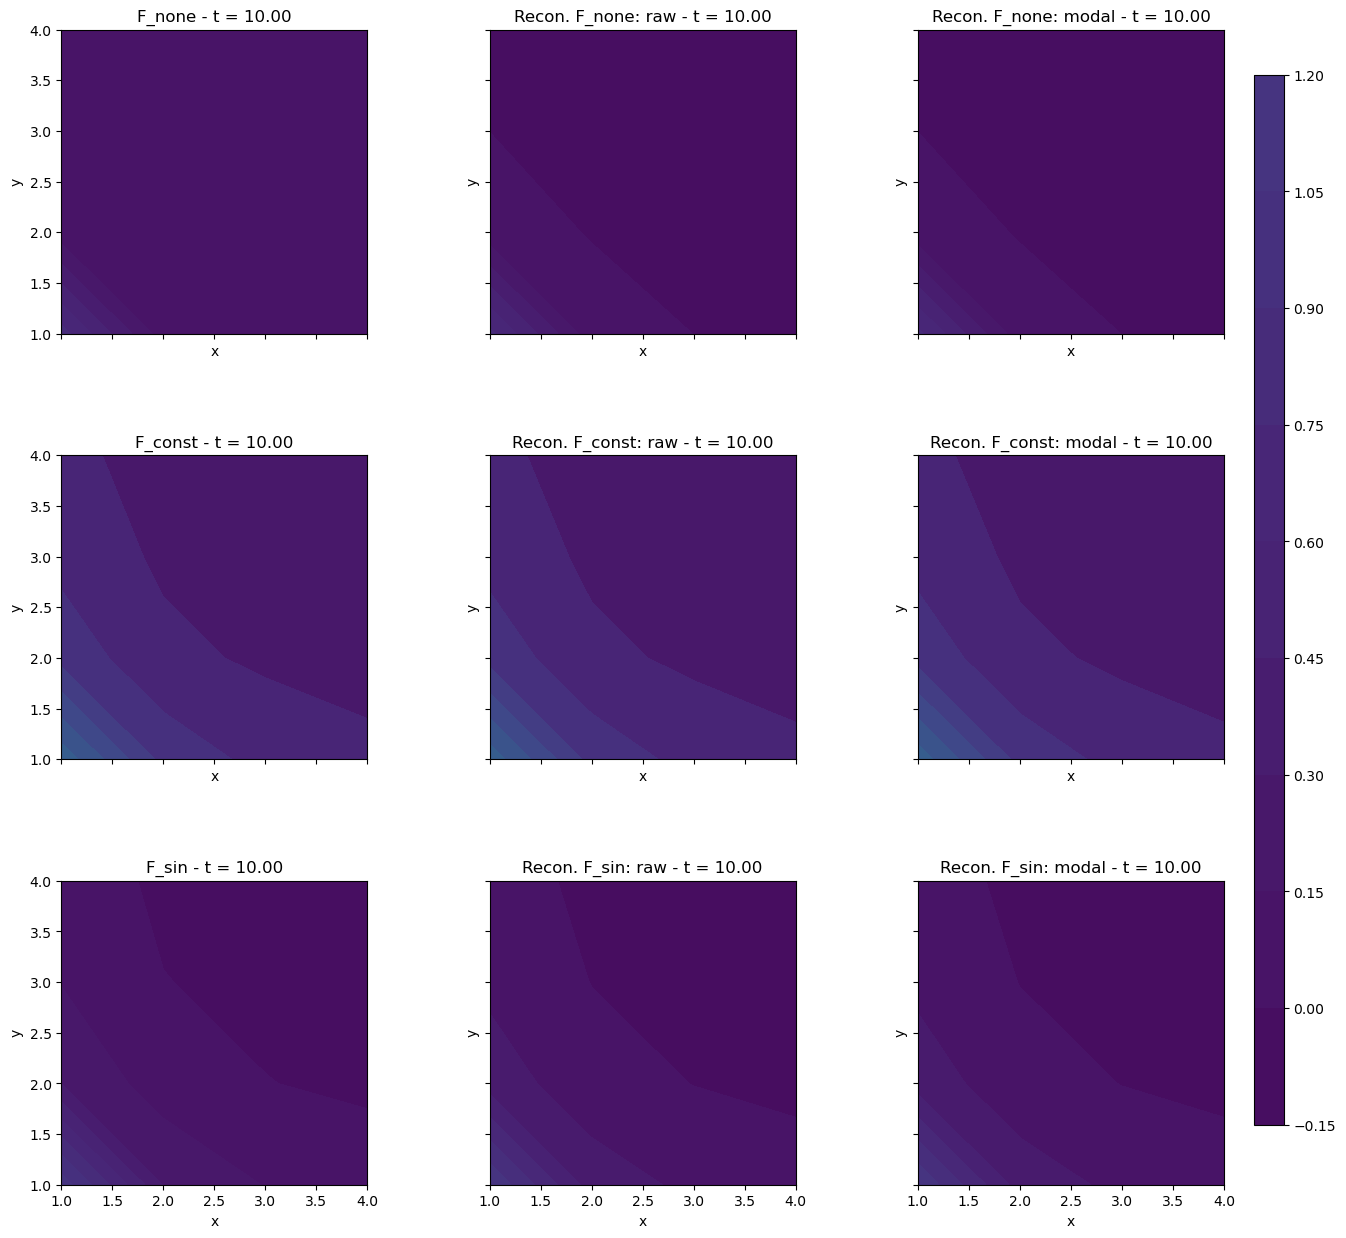

Error from raw estimation.
	L2 Error, F_none: 4.71021
	L2 Error, F_const: 4.58369
	L2 Error, F_sin: 4.99131
Avg. L2 Error: 4.76174

Error from modal estimation.
	L2 Error, F_none: 4.71021
	L2 Error, F_const: 4.58369
	L2 Error, F_sin: 4.99131
Avg. L2 Error: 4.76174



In [86]:
# Calculate L
L_raw = response_utils.calc_L_direct_2D(T_none, F_none, t)
L_modal = response_utils.calc_L_direct_2D(a_none, F_none, t, modal=True, g=g_none)

# Calculate L2 error and plot results
L2_raw, L2_modal = response_utils.plot_response_3D(T_vec, F_vec,
                                                   labels, t, x, y,
                                                   L_raw, L_modal,
                                                   T0, dt,
                                                   plot_time=100,
                                                   animate=False,
                                                   num_frames=100,
                                                   playback_speed=100)

#### Optional: Save animation of time evolution

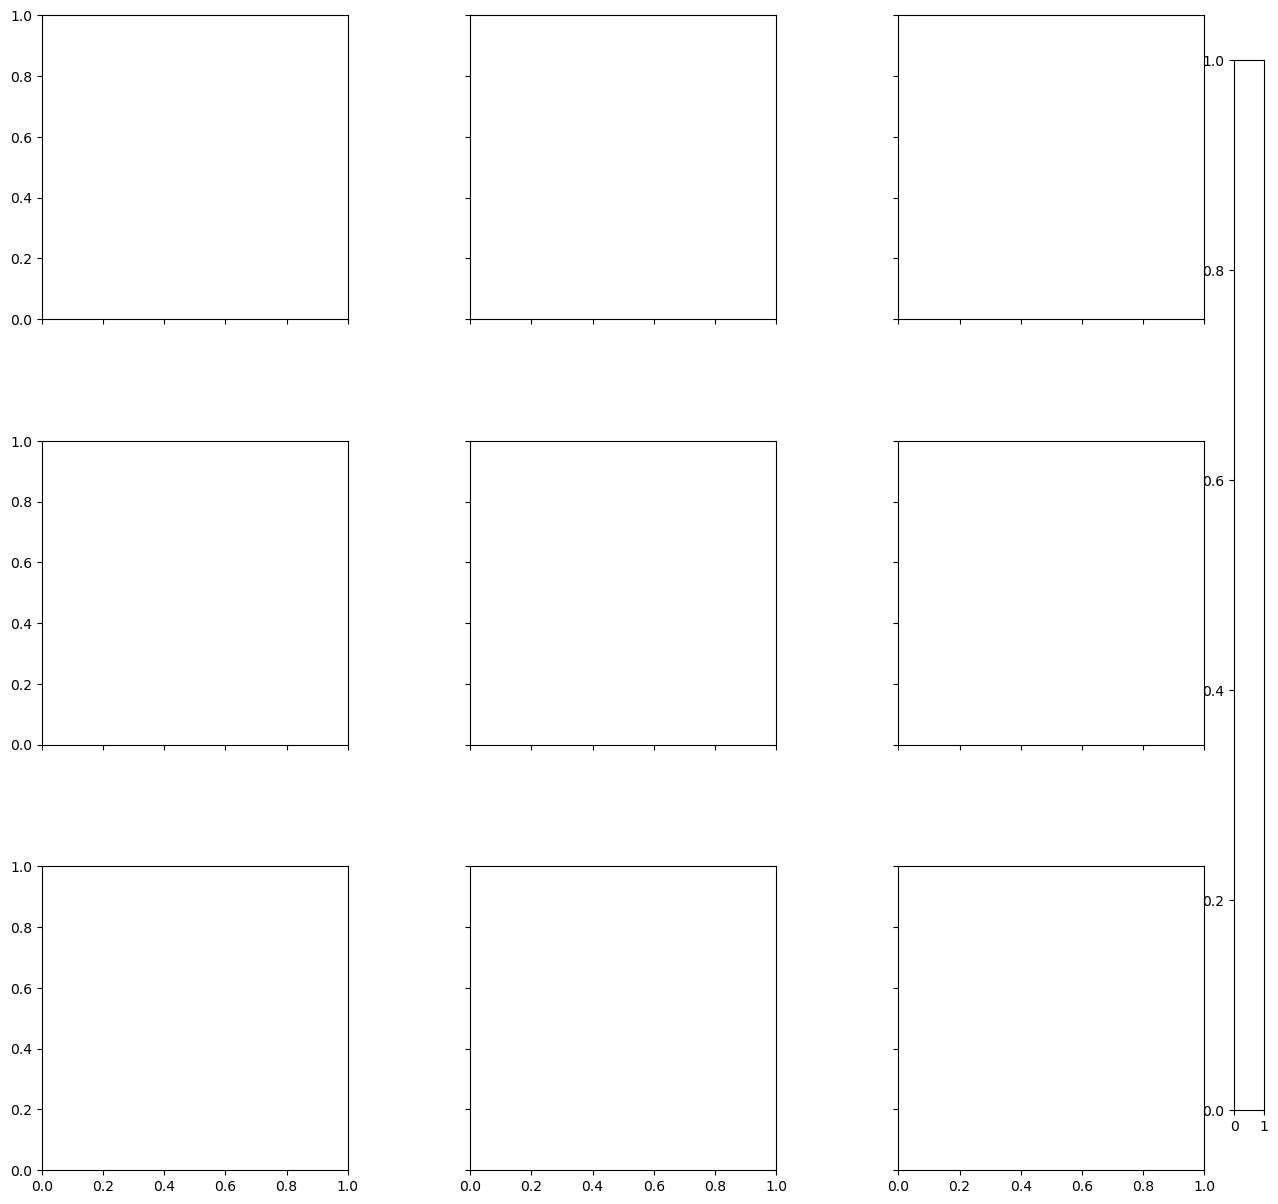

MovieWriter imagemagick unavailable; using Pillow instead.


In [61]:
anim = response_utils.plot_response_3D(T_vec, F_vec,
                                       labels, t, x, y,
                                       L_raw, L_modal,
                                       T0, dt,
                                       plot_time=100,
                                       animate=True,
                                       num_frames=100,
                                       playback_speed=100)
anim.save("response_3D_method_1.gif", writer='imagemagick')

### Method 2: Direct derivation of response functions using an impulse forcing

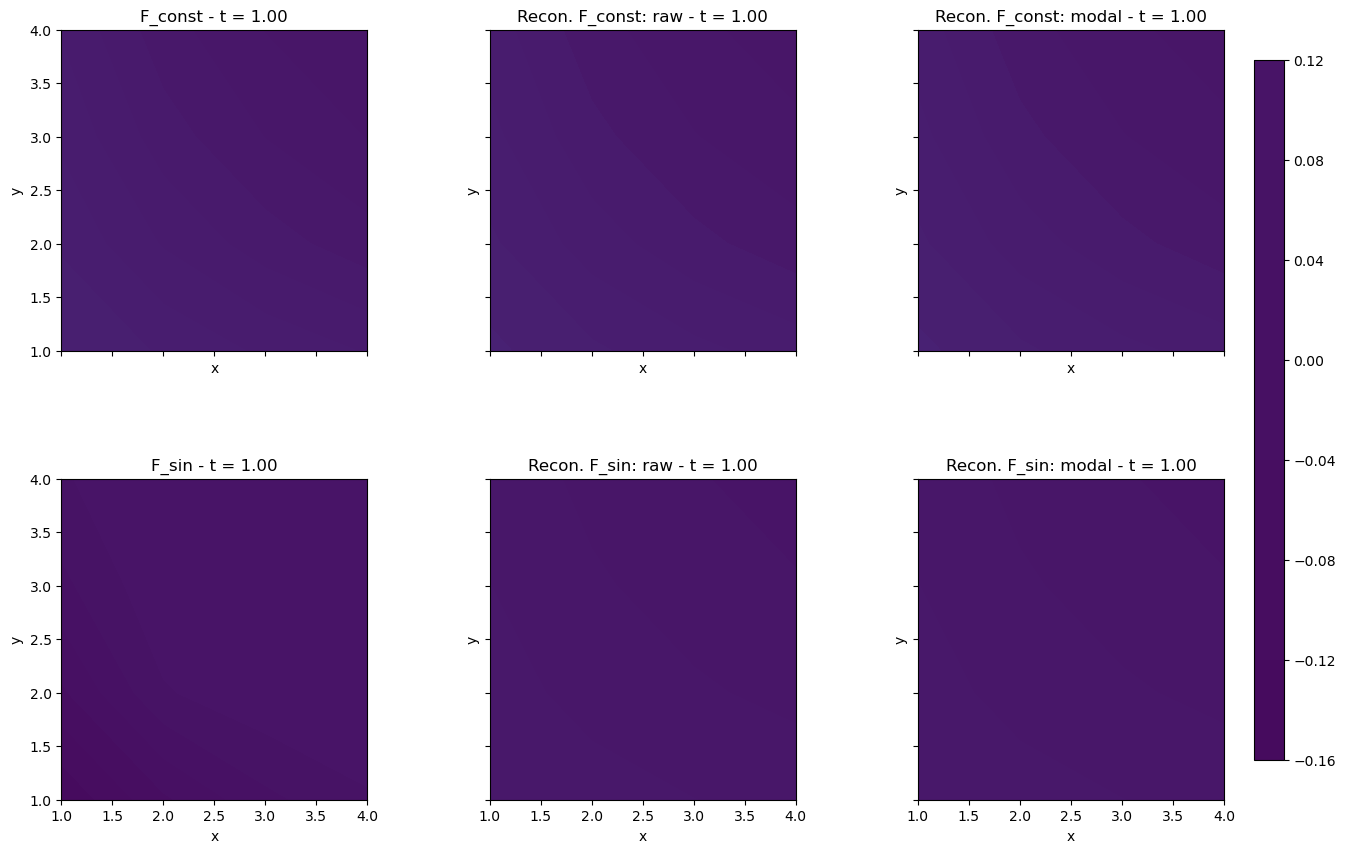

Error from raw estimation.
	L2 Error, F_const: 0.25302
	L2 Error, F_sin: 3.26882
Avg. L2 Error: 1.76092

Error from modal estimation.
	L2 Error, F_const: 0.25302
	L2 Error, F_sin: 3.26882
Avg. L2 Error: 1.76092



In [103]:
# Calculate G
G_raw = response_utils.T_del(t, k, F0, dim=3, x=x, y=y)
g, G_modal = response_utils.calc_modes_2D(G_raw)

# Calculate L2 error and plot results
L2_raw, L2_modal = response_utils.plot_response_conv_3D(T_vec, F_vec,
                                                        labels, t, x, y,
                                                        G_raw, G_modal,
                                                        g, dt,
                                                        plot_time=10,
                                                        animate=False,
                                                        num_frames=100,
                                                        playback_speed=100)

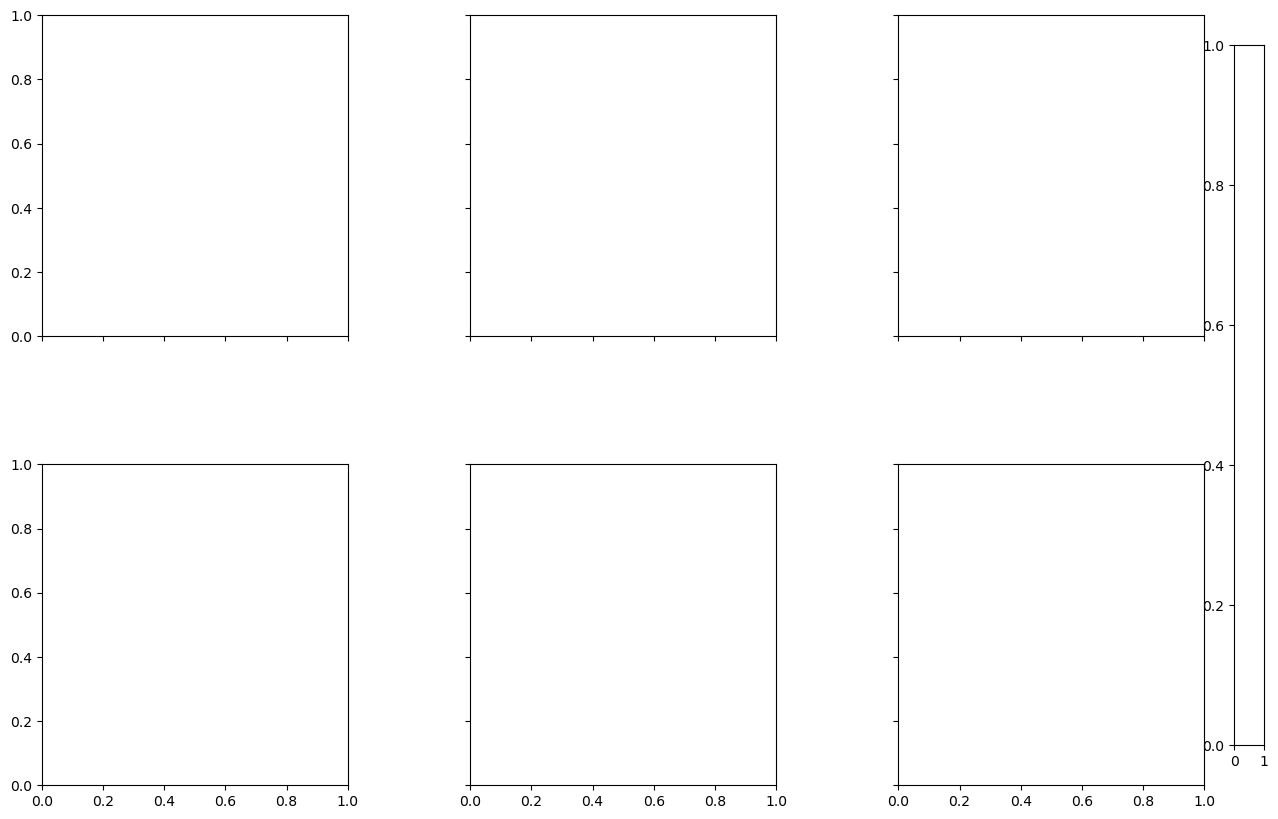

MovieWriter imagemagick unavailable; using Pillow instead.


In [113]:
anim = response_utils.plot_response_conv_3D(T_vec, F_vec,
                                            labels, t, x, y,
                                            G_raw, G_modal,
                                            g, dt,
                                            plot_time=10,
                                            animate=True,
                                            num_frames=100,
                                            playback_speed=100)
anim.save("response_3D_method_2.gif", writer='imagemagick')

### Method 3: Derivation through deconvolution

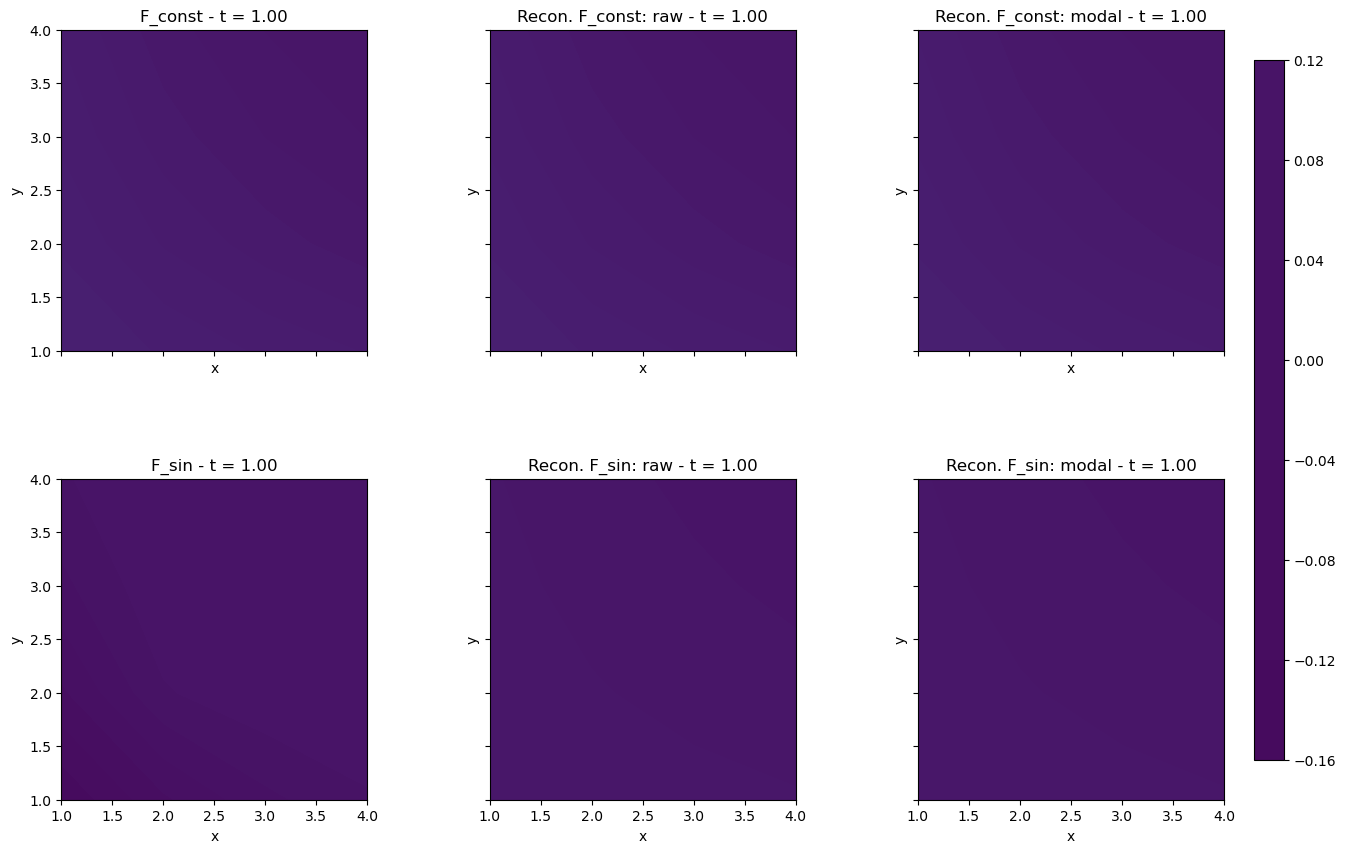

Error from raw estimation.
	L2 Error, F_const: 0.0
	L2 Error, F_sin: 3.28616
Avg. L2 Error: 1.64308

Error from modal estimation.
	L2 Error, F_const: 0.0
	L2 Error, F_sin: 3.28616
Avg. L2 Error: 1.64308



In [107]:
# Calculate G
G_raw = response_utils.calc_G_deconv_2D(T_const - T_none, F_const, dt)
G_modal = response_utils.calc_G_deconv_2D(a_const_sub, F_const, dt)

# Calculate L2 error and plot results
L2_raw, L2_modal = response_utils.plot_response_conv_3D(T_vec, F_vec,
                                                        labels, t, x, y,
                                                        G_raw, G_modal,
                                                        g_const_sub, dt,
                                                        plot_time=10,
                                                        animate=False,
                                                        num_frames=100,
                                                        playback_speed=100)

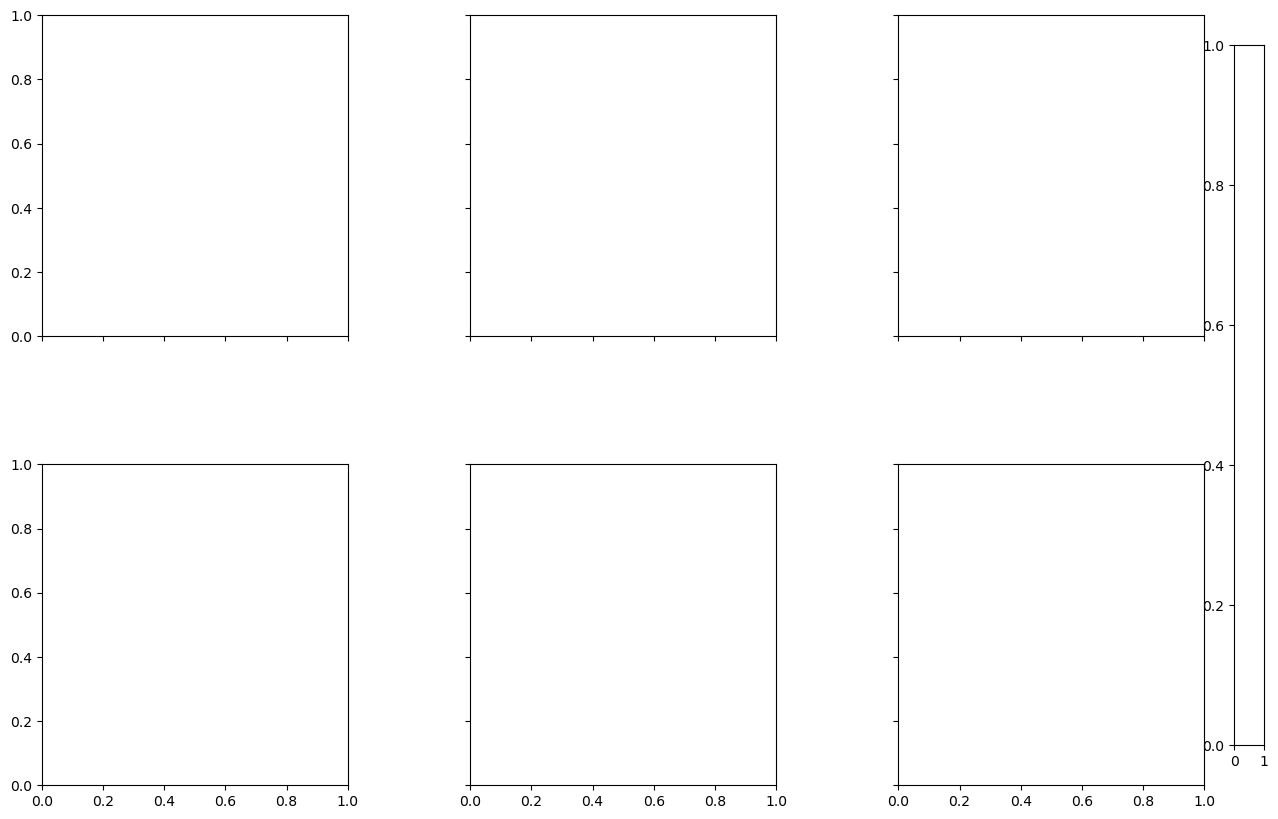

MovieWriter imagemagick unavailable; using Pillow instead.


In [114]:
anim = response_utils.plot_response_conv_3D(T_vec, F_vec,
                                            labels, t, x, y,
                                            G_raw, G_modal,
                                            g_const_sub, dt,
                                            plot_time=10,
                                            animate=True,
                                            num_frames=100,
                                            playback_speed=100)
anim.save("response_3D_method_3.gif", writer='imagemagick')

### Method 4: Representing G with only leading timescales

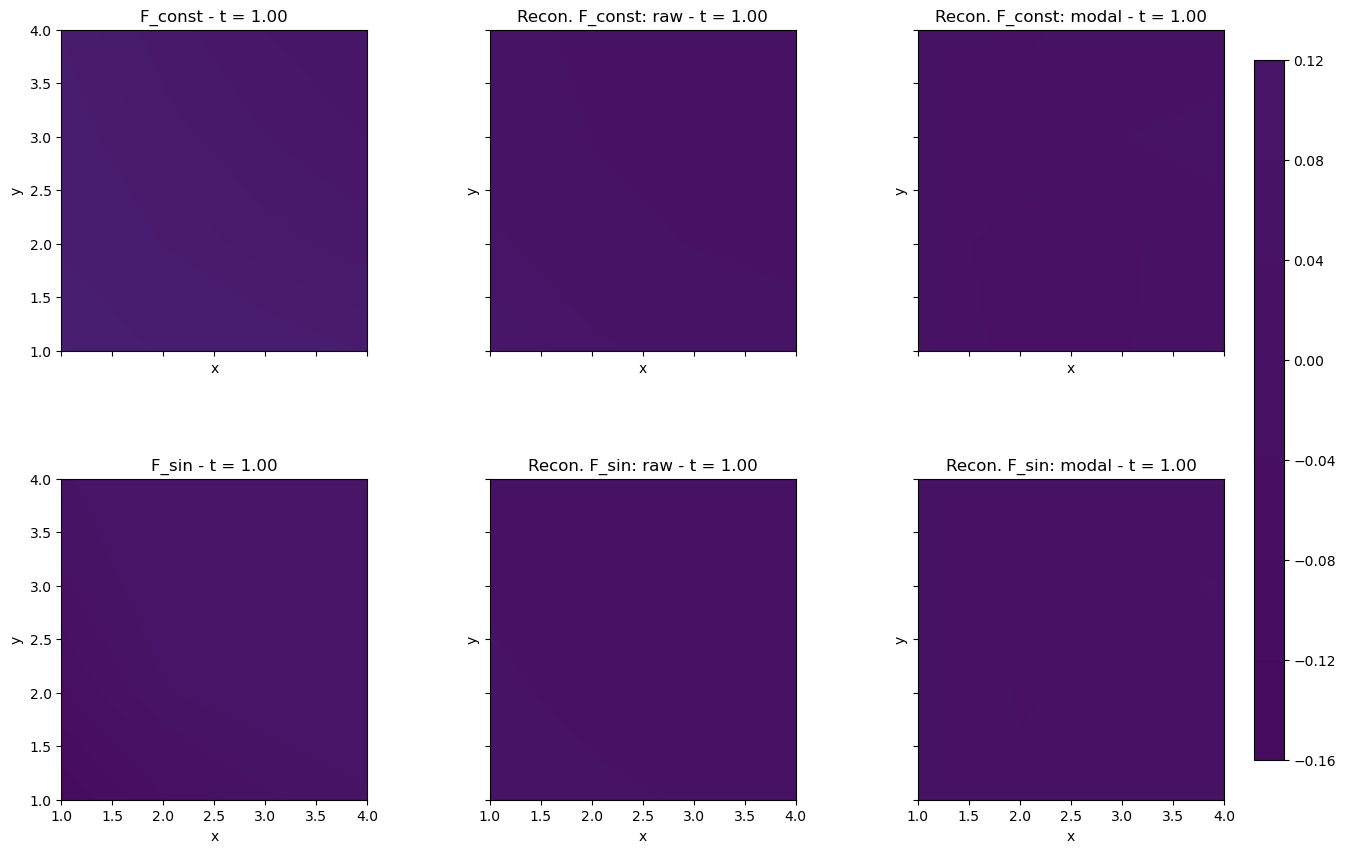

Error from raw estimation.
	L2 Error, F_const: 16.48969
	L2 Error, F_sin: 14.21093
Avg. L2 Error: 15.35031

Error from modal estimation.
	L2 Error, F_const: 45.83452
	L2 Error, F_sin: 15.79438
Avg. L2 Error: 30.81445



In [110]:
m = len(x)*len(y[0])
initial_h = np.ones(m)
initial_lam = 1.0
initial_guess = np.concatenate([initial_h, [initial_lam]])
bounds = [(None, None)] * m + [(1e-10, 0.9999999999)]
options = {'disp': False}

res_raw = minimize(response_utils.opt_h_lam_3D,
              initial_guess,
              args=(T_const - T_none, F_const, t, m, dt),
              bounds=bounds,
              options=options)
res_modal = minimize(response_utils.opt_h_lam_3D,
                    initial_guess,
                    args=(a_const_sub, F_const, t, m, dt),
                    bounds=bounds,
                    options=options)

G_opt_raw = response_utils.apply_response_3D(res_raw.x, t, m)
G_opt_modal = response_utils.apply_response_3D(res_modal.x, t, m)

# Calculate L2 error and plot results
L2_raw, L2_modal = response_utils.plot_response_conv_3D(T_vec, F_vec,
                                                        labels, t, x, y,
                                                        G_opt_raw, G_opt_modal,
                                                        g_const_sub, dt,
                                                        plot_time=10,
                                                        animate=False,
                                                        num_frames=100,
                                                        playback_speed=100)

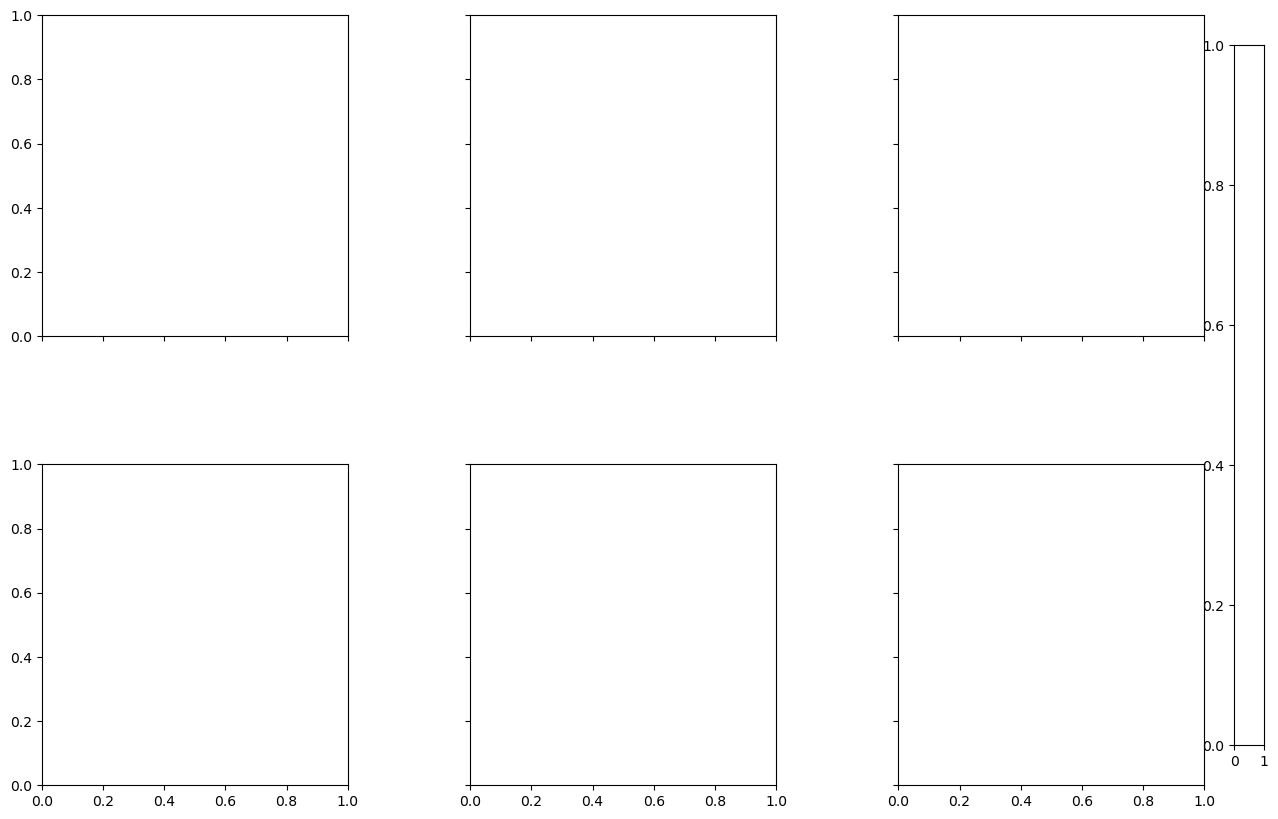

MovieWriter imagemagick unavailable; using Pillow instead.


In [115]:
anim = response_utils.plot_response_conv_3D(T_vec, F_vec,
                                            labels, t, x, y,
                                            G_opt_raw, G_opt_modal,
                                            g_const_sub, dt,
                                            plot_time=10,
                                            animate=True,
                                            num_frames=100,
                                            playback_speed=100)
anim.save("response_3D_method_4.gif", writer='imagemagick')

### Method 4: Representing G with only leading timescales (iterative minimization)

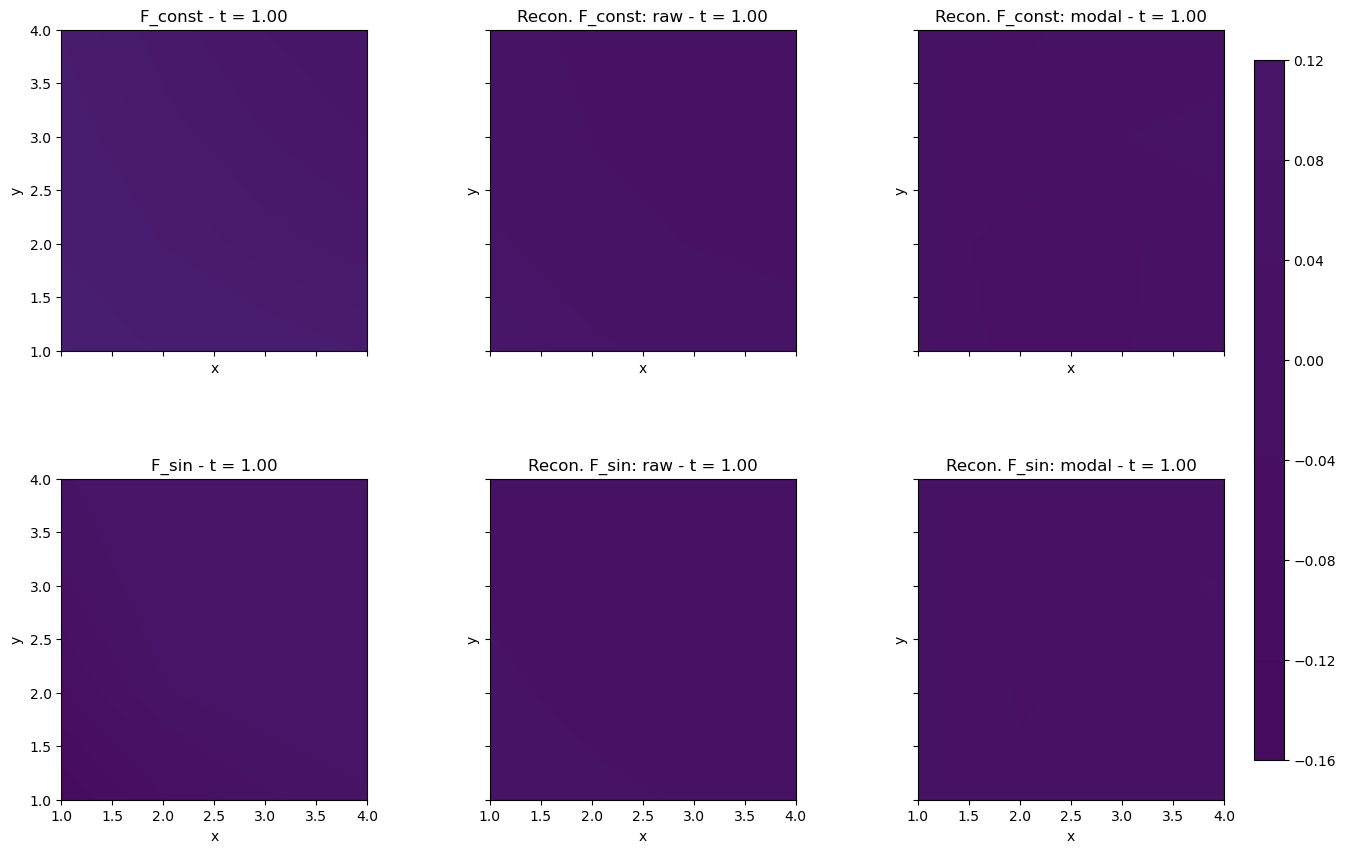

Error from raw estimation.
	L2 Error, F_const: 16.48969
	L2 Error, F_sin: 14.21093
Avg. L2 Error: 15.35031

Error from modal estimation.
	L2 Error, F_const: 45.83452
	L2 Error, F_sin: 15.79438
Avg. L2 Error: 30.81445



In [121]:
m = len(x)*len(y[0])

# Number of iterations to run
k = 1

# Run the iterative minimization
h_raw, lam_raw = response_utils.iterative_minimization(T_const - T_none, F_const, t, m, dt, k)
h_modal, lam_modal = response_utils.iterative_minimization(a_const_sub,  F_const, t, m, dt, k)

G_opt_raw = response_utils.apply_response_cumulative_2D(h_raw, lam_raw, T_const, t, k)
G_opt_modal = response_utils.apply_response_cumulative_2D(h_modal, lam_modal, a_const_sub, t, k)

# Calculate L2 error and plot results
L2_raw, L2_modal = response_utils.plot_response_conv_3D(T_vec, F_vec,
                                                        labels, t, x, y,
                                                        G_opt_raw, G_opt_modal,
                                                        g_const_sub, dt,
                                                        plot_time=10,
                                                        animate=False,
                                                        num_frames=100,
                                                        playback_speed=100)